#### This notebooks demonstrates the use of tif_tools.py functions
#### These functions were created to automate some of the DEM preprocessing steps needed in hydrological analysis. This work can be further extended.
##### The functions were first created and tested with manually downloaded DEM tif rasters from National Land Survey of Finland. Furthermore, the module was advanced to be able to automate the download process
##### Functions from tif_tools.py include:
##### - Plotting tif files from a local repository
##### - Creating a mosaic of multiple tif files 
##### - User defined clipping for tif
##### - Automated digital elevation model (DEM) download from National Land Survey of Finland database
##### - Defining flow direction for hydrological use
-------------

In [1]:
# Importing preprocessing functions from tif_tools.py
import tif_tools as tt

# Importing other useful modules
import matplotlib.pyplot as plt
from rasterio.plot import show
import os

In [2]:
# Checking help of functions
help(tt.show_files)
help(tt.raster_from_mml)
help(tt.tifs_to_mosaic)
help(tt.tif_clip)
help(tt.d8_flowdir)

Help on function show_files in module tif_tools:

show_files(dirpath, search_criteria='*.tif', cmap='terrain')
    This function plots the first four tif-files from local dirpath directory
    Can be used to test if the tif files look correct and ready for further analysis
    
    Parameters:
    dirpath = the local repository where the tif files are (str)
    search_criteria = criteria to select files (str)
    cmap = colormap for plotting (str - default = 'terrain')

Help on function raster_from_mml in module tif_tools:

raster_from_mml(dirpath, subset, layer='korkeusmalli_2m', form='image/tiff', plot=False, cmap='terrain')
    Downloads a raster from MML database and writes it to dirpath folder in local memory
    
    Parameters:
    subset = boundary coordinates [minx, miny, maxx, maxy] (list)
    layer = the layer wanted to fetch e.g. 'korkeusmalli_2m' or 'korkeusmalli_10m' (str)
    form = form of the raster e.g 'image/tiff' (str)
    plot = whether or not to plot the created r

#### Help of the functions are informative and let us know what to assign in the parameters.
-------------------------
#### Next let's define some variable for easier parameter management in this demo

In [3]:
# Defining some basic variables for further use
mosaic_name = 'mosaic.tif'
mosaic_clip_name = 'mosaic_clipped.tif'
flow_dir_name = 'd8_flowdir.tif'
subset = [382600.0,7541804.0,385824.0,7545710.0]
dirpath='data'

#### First, let's test our show_files function to see if our manually downloaded tif files look appropriate

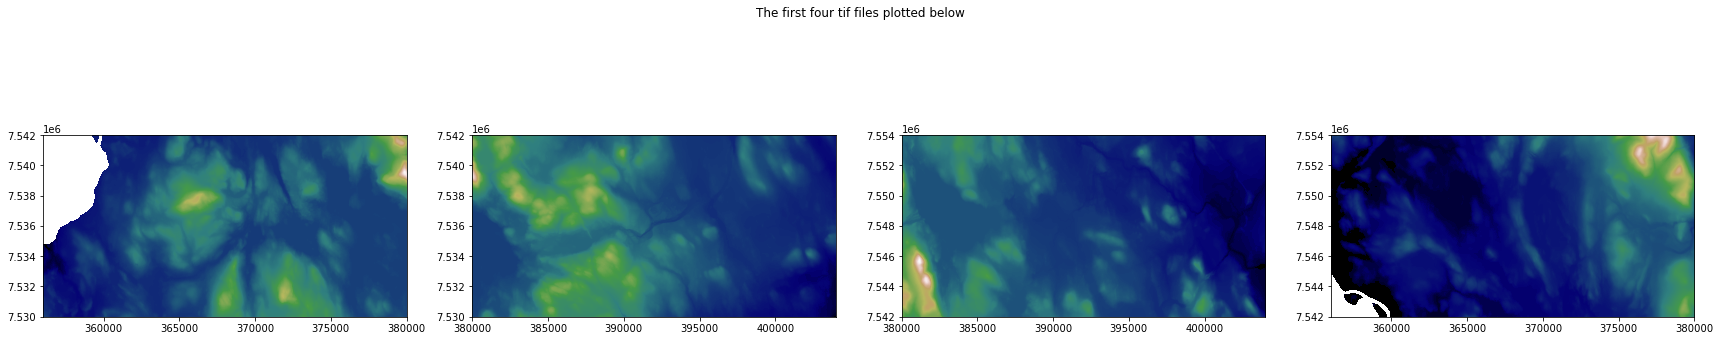

In [4]:
# Use a function to plot original files from a local repository
tt.show_files(dirpath=dirpath, cmap='gist_earth')

#### Then, let's make a mosaic of the tif files we have downloaded manually from Maanmittauslaitos

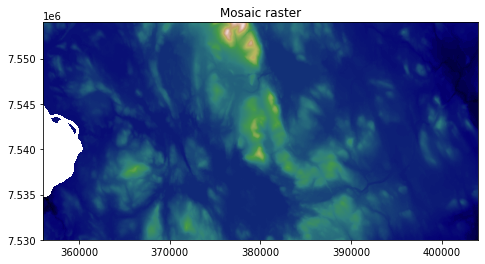

In [5]:
# Use a function to create mosaic from multiple tif rasters
mosaic = tt.tifs_to_mosaic(dirpath=dirpath, out_fn=mosaic_name, search_criteria='V*.tif', plot=True, cmap='gist_earth')

In [6]:
# Let's check some basics of our data
print(mosaic.shape)
print(mosaic.meta)
print('')
print(mosaic.read(1))

(2400, 4800)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4800, 'height': 2400, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(10.0, 0.0, 356000.0,
       0.0, -10.0, 7554000.0)}

[[314.867 314.74  314.82  ... 222.668 222.635 222.602]
 [314.453 314.435 314.536 ... 223.319 223.301 223.264]
 [314.013 313.915 313.66  ... 223.903 223.844 223.815]
 ...
 [257.268 257.437 257.496 ... 205.613 205.512 205.5  ]
 [257.469 257.66  257.75  ... 205.476 205.507 205.395]
 [257.937 257.96  257.963 ... 205.316 205.214 205.21 ]]


#### Another function for test. This one clips the raster with a user defined boundary coordinates

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


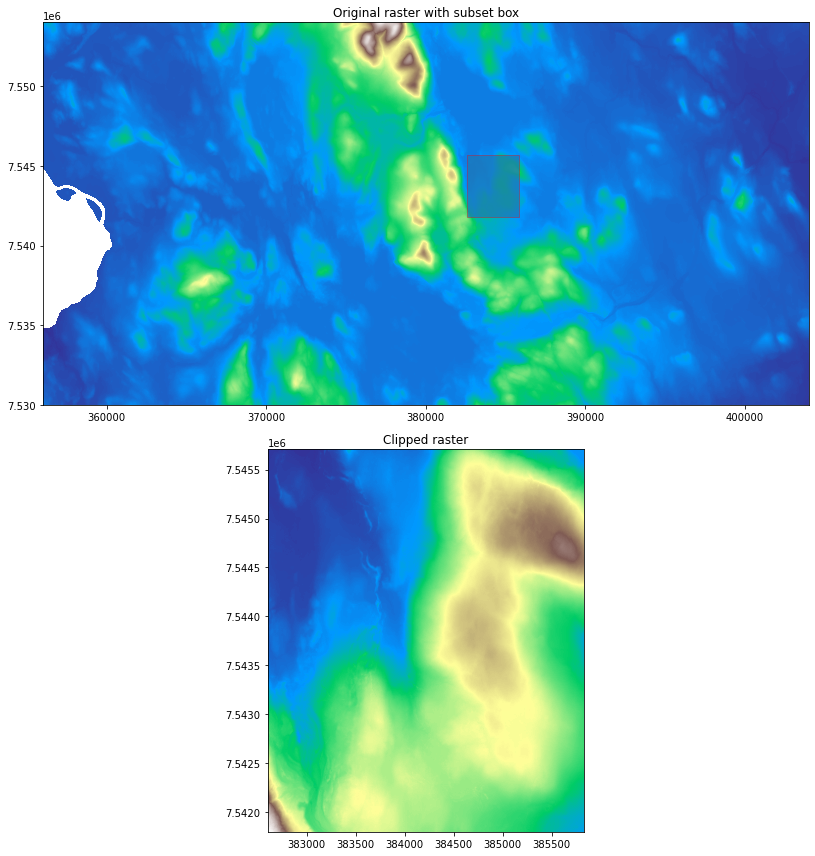

In [7]:
# Use a function to clip tif raster to specific bounding box (default cmap = 'terrain')
clipped_mosaic = tt.tif_clip(subset=subset, dirpath='data/processed', in_fn=mosaic_name, out_fn=mosaic_clip_name, plot=True)

#### Another independent function is raster_from_mml. It fetches user defined rasters from National Land Survey of Finland database. At the moment works with 2 and 10 meter resolution DEMs but further developments are possible

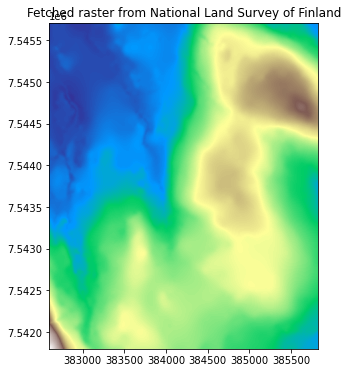

In [8]:
# Let's try to fetch the same DEM as clipped_mosaic automatically from MML server
mml_raster = tt.raster_from_mml(dirpath=dirpath, subset=subset, layer='korkeusmalli_10m', form='image/tiff', plot=True)

In [9]:
# Let's check the shape of our data
print(clipped_mosaic.shape)
print(clipped_mosaic.meta)
print(mml_raster.shape)
print(mml_raster.meta)

# Check if clipped_mosaic equals mml_raster since they were done with same subsetting parameters
if clipped_mosaic.shape != mml_raster.shape:
    print('Shapes are different. Perhaps you did something wrong or there is a disrepancy with the subsetting settings')

(391, 323)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 323, 'height': 391, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(10.0, 0.0, 382600.0,
       0.0, -10.0, 7545710.0)}
(489, 403)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 403, 'height': 489, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(8.0, 0.0, 382600.0,
       0.0, -8.0, 7545712.0)}
Shapes are different. Perhaps you did something wrong or there is a disrepancy with the subsetting settings


In [10]:
# Let's try some other area (notice it automatically saves the fetched raster, could be good to add another parameter save=True/False)
mml_raster2 = tt.raster_from_mml(dirpath=dirpath, subset=[376000.0,7558000.0,379000.0,7562000.0], layer='korkeusmalli_10m', form='image/tiff', plot=False, cmap='Spectral')

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


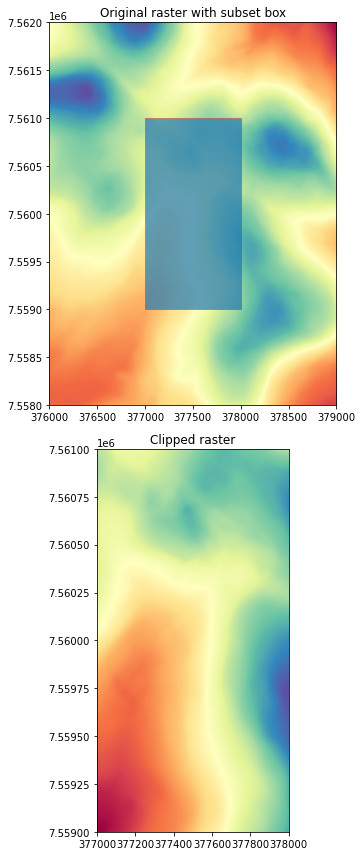

In [11]:
# Let's try to clip this one
clipped_mml = tt.tif_clip(subset=[377000.0,7559000.0,378000.0,7561000.0], dirpath='data', in_fn='korkeusmalli_10m.tif', out_fn='korkeusmalli_10m_clip.tif', plot=True, cmap='Spectral')

#### Next function creates a raster of flow directions. 
#### It goes through all cells in DEM raster and for each cell finds the lowest cell within the neighboring 8 cells. Depending on the location of the lowest neighbor, the function defines the flow direction in degrees radius.

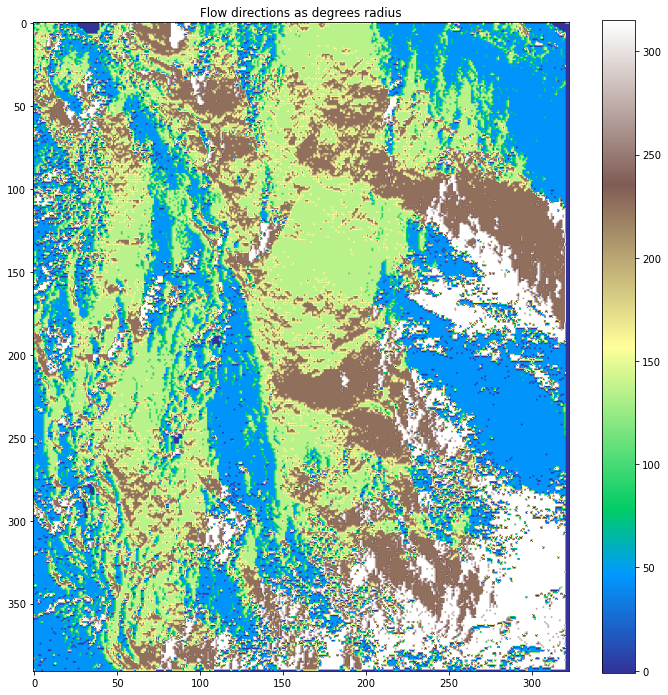

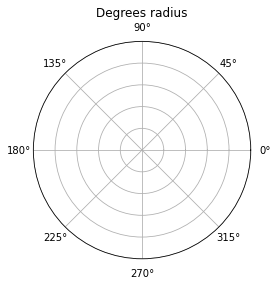

In [12]:
# Use a function to define flow direction for each cell in a tif raster
flow_dir = tt.d8_flowdir(in_fn=mosaic_clip_name, dirpath='data/processed', out_fn=flow_dir_name, plot=True)#, save=False)

In [13]:
# Let's check some basics of our flow_dir
print(flow_dir.meta)
print('')
print(flow_dir.read(1))

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 323, 'height': 391, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(10.0, 0.0, 382600.0,
       0.0, -10.0, 7545710.0)}

[[270. 225.   0. ...  -1. 315. 315.]
 [ -1. 180.  45. ...  -1.   0.   0.]
 [ 90. 135. 180. ...  -1.   0.   0.]
 ...
 [ 45.  45.  45. ... 315.   0.   0.]
 [ 45.  45.  45. ... 315.   0.   0.]
 [315.  45.  45. ...   0.   0.   0.]]


##### -1 means that the cell itself is the lowest and therefore there is no flow (in reality this would not be the case)

-----------------------
#### End of the demo
##### Functions of tif_tools module work with these simple examples. 
##### There is still plenty to do to expand the use of the functions and make them more robust. However, time was not enough to do that during this final assignment but I will possibly continue working with this module later. 
##### This was a good introduction for rasterio package which seem convenient for raster processing. 
##### However, I am not sure whether using tifs and rasterio with python is better than using ascii files with numpy.

------------------------------
##### Possible extensions:
##### From flow directions to flow accumulation raster -> how many upstream cells accumulate each cell
##### From flow direction to catchment area -> What is the area accumulating a specific cell e.g where a discharge measurement lies (before this, possibly need to make correction for pits and depressions)
##### DEM to slope -> What is slope of each cell
##### DEM together with ditches -> Perhaps drop DEM -1m where there are ditches (continous flow)